In [2]:
import pandas as pd
import numpy as np
airquality = pd.read_csv("http://www.brycejdietrich.com/files/airquality.csv")

1. Run the describe method in Python for airquality. For each variable, describe its type and scale. Based on these statistics, describe the shape of each of the quantitative variables.

In [3]:
airquality.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


2. Make a graph of Wind. Is its shape consistent with what you said in #1?

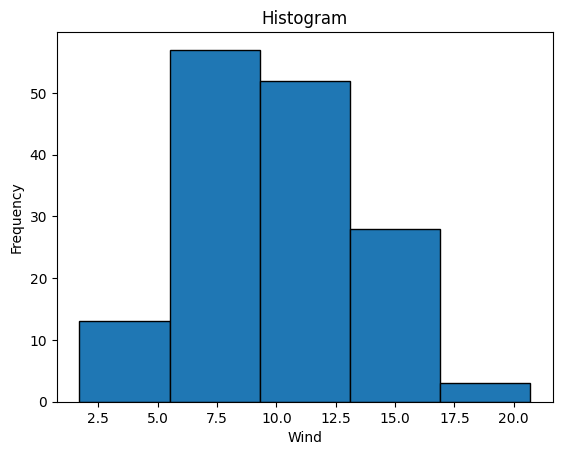

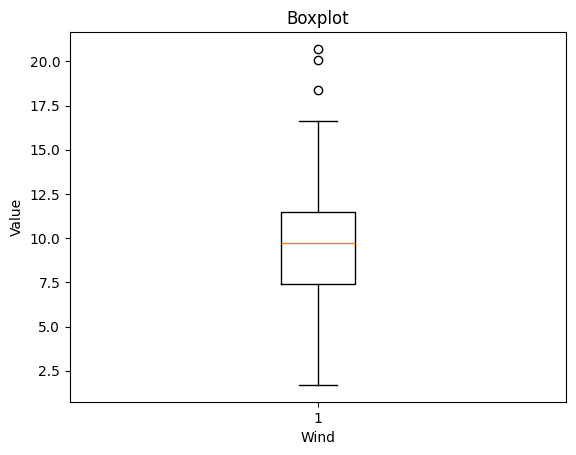

In [4]:
import matplotlib.pyplot as plt

plt.hist(airquality['Wind'], bins=5, edgecolor='black')
plt.xlabel('Wind')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

plt.boxplot(airquality['Wind'])
plt.title('Boxplot')
plt.xlabel('Wind')
plt.ylabel('Value')
plt.show()

3. Make a graph of solar.r. Is its shape consistent with what you said in #1?

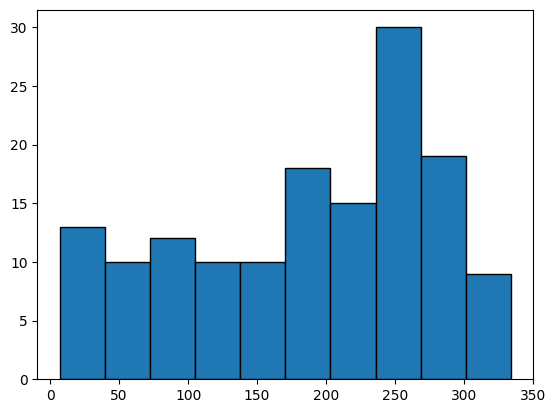

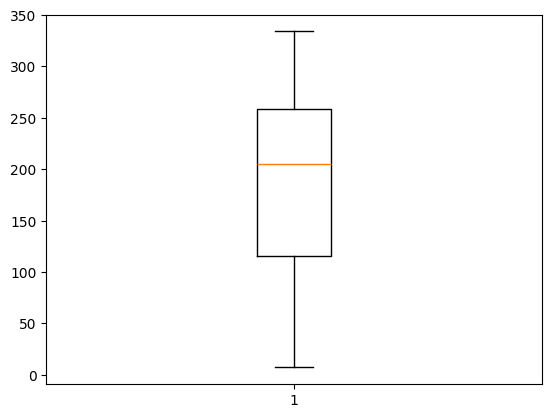

In [5]:
plt.hist(airquality['Solar.R'], edgecolor='black')
plt.show()

plt.boxplot(airquality['Solar.R'].dropna())
plt.show()

4. Find the mean Temp and the standard deviation of Temp for each Month in airquality.

In [11]:
means = airquality.groupby('Month')['Temp'].mean().reset_index()
print(means)
stdev = airquality.groupby('Month')['Temp'].std()
print(stdev)

   Month       Temp
0      5  65.548387
1      6  79.100000
2      7  83.903226
3      8  83.967742
4      9  76.900000
Month
5    6.854870
6    6.598589
7    4.315513
8    6.585256
9    8.355671
Name: Temp, dtype: float64


5. Make boxplots of Temp across each Month. Make them colorful. If somed you what typical temperatures were in these months, would you tell them about the means or about the medians? Why?

/var/folders/yh/q29t0rh92yq9ns3kfy5329gw0000gn/T/ipykernel_51825/4010629831.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = ax.boxplot(


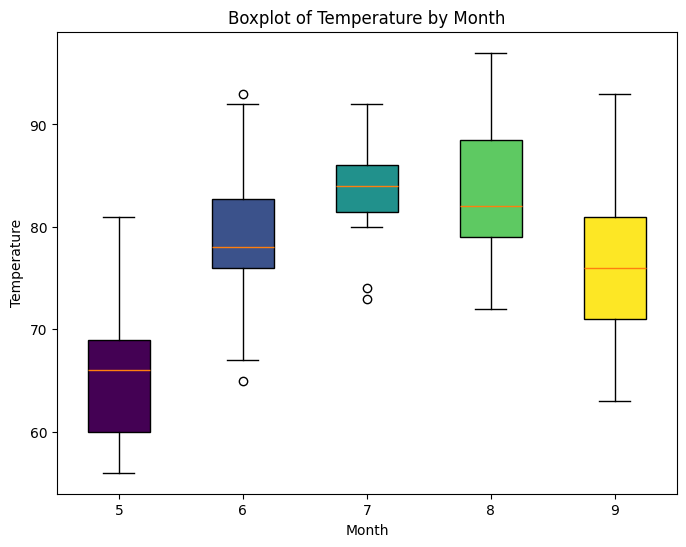

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

boxplot = ax.boxplot(
    [group['Temp'] for _, group in airquality.groupby('Month')],
    patch_artist=True,
    labels=airquality['Month'].unique()
)

ax.set_title("Boxplot of Temperature by Month")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature")

# add some fancy coloring
colors = plt.cm.viridis(np.linspace(0, 1, len(boxplot['boxes'])))
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

The means and medians are pretty similar here in each month, so either would probably be good answers. Due to some low outliers in June and July, I might lean toward reporting the medians instead of the means. But why not both?

6. Are there any outliers in the Ozone vector? If so, identify the day(s) with the outlier(s).

61     135.0
116    168.0
Name: Ozone, dtype: float64


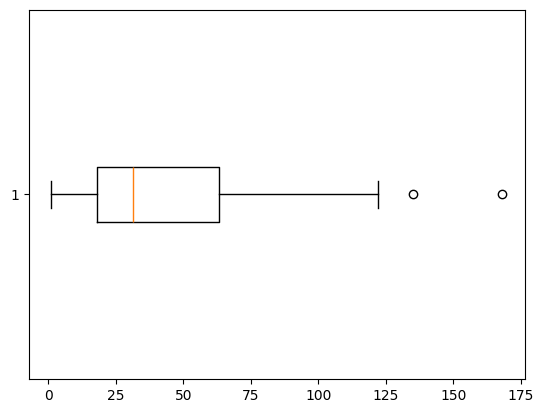

In [13]:
OzoneQs = airquality['Ozone'].quantile([0.25, 0.75]).values
iqr = OzoneQs[1] - OzoneQs[0]
OzoneLLandUL = OzoneQs + np.array([-1.5, 1.5]) * iqr
OzoneOutliers = airquality['Ozone'][(airquality['Ozone'] > OzoneLLandUL[1]) & airquality['Ozone'].notna()]
print(OzoneOutliers)
# Have to remove missing values
plt.boxplot(airquality['Ozone'].dropna(), vert=False)
plt.show()

7. Plot Ozone versus Solar.R. Does it appear that the two are related? How so?

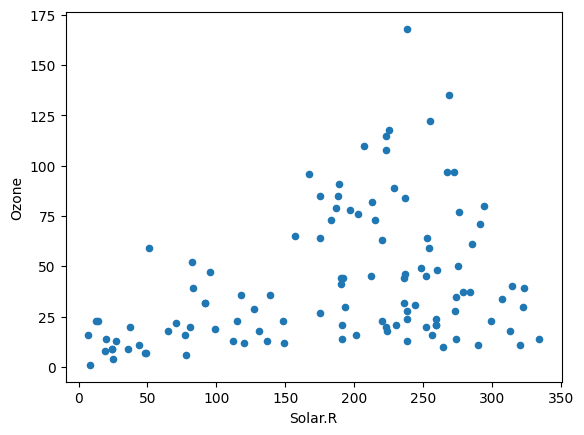

In [14]:
airquality.plot.scatter(x='Solar.R', y='Ozone')
plt.show()

Yes, days with higher Solar.R (solar radiation) tend to have higher Ozone levels, but it is far from a perfect relationship. There is a lot of variance in Ozone for the higher Solar.R days.

8. Make a barplot of Month. What does this tell you (It should be nothing shocking)? If you are disappointed in how boring this last question was, then try playing around with the axis labels of the graph to make them a bit more descriptive.

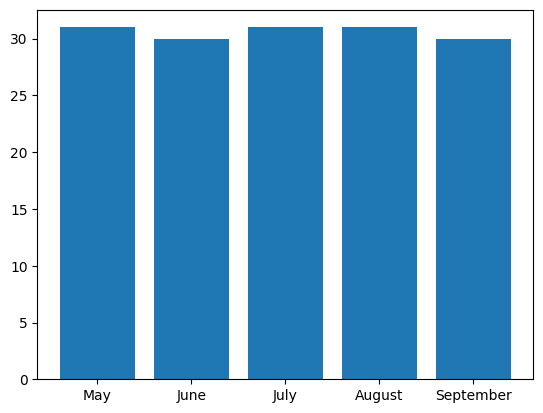

In [15]:
frequency_table = airquality['Month'].value_counts().sort_index()
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_labels = [month_names[i - 1] for i in frequency_table.index]
plt.bar(frequency_table.index, frequency_table.values, tick_label=month_labels)
plt.show()

31 days recorded for May, July, and August; 30 days recorded for June and September. No missing days.